# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Ainur Rokhimah
- **Email:** M008D4KX2937@bangkit.academy
- **ID Dicoding:** 	M008D4KX2937

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Bagaimana pengaruh musim terhadap jumlah peminjaman sepeda harian?
- Pertanyaan 2: Apakah terdapat perbedaan jumlah peminjam sepeda harian antara hari kerja (*workingday*) dan hari libur (*holiday*)?

## Import Semua Packages/Library yang Digunakan

In [5]:
#menyiapkan semua library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [62]:
#membaca dataset
day = pd.read_csv('day.csv')
hour = pd.read_csv("hour.csv")

In [7]:
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [8]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Dari output di atas, dapat diketahui bahwa data *day.csv* memiliki 731 baris dan 16 kolom.

In [9]:
hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [10]:
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Dari output di atas, dapat diketahui bahwa data *hour.csv* memiliki 17379 baris dan 17 kolom.

## Data Wrangling

### Gathering Data

In [68]:
bike_sharing = day.merge(hour, on='dteday', how='inner', suffixes=('_daily', '_hourly'))
bike_sharing

,instant_daily,dteday,season_daily,yr_daily,mnth_daily,holiday_daily,weekday_daily,workingday_daily,weathersit_daily,temp_daily,...,weekday_hourly,workingday_hourly,weathersit_hourly,temp_hourly,atemp_hourly,hum_hourly,windspeed_hourly,casual_hourly,registered_hourly,cnt_hourly
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,731,2012-12-31,1,1,12,0,1,1,2,0.215833,...,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,731,2012-12-31,1,1,12,0,1,1,2,0.215833,...,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,731,2012-12-31,1,1,12,0,1,1,2,0.215833,...,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,731,2012-12-31,1,1,12,0,1,1,2,0.215833,...,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


Dalam analisis ini, dua data frame, yaitu 'day' dan 'hour', digabungkan menggunakan metode inner join berdasarkan kolom 'dteday'. Suffixes "_daily" dan "_hourly" ditambahkan untuk membedakan kolom dengan nama yang sama. Hasilnya, data frame baru yang disebut 'bike_sharing' terbentuk. Selanjutnya, data 'bike_sharing' ditampilkan. Output tersebut menunjukkan bahwa data 'bike_sharing' memiliki 17379 baris dan 32 kolom.

### Assessing Data

Pada tahap ini akan dicek tipe data dan parameter statistik dari data 'bike_sharing'.

In [13]:
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   instant_daily      17379 non-null  int64  
 1   dteday             17379 non-null  object 
 2   season_daily       17379 non-null  int64  
 3   yr_daily           17379 non-null  int64  
 4   mnth_daily         17379 non-null  int64  
 5   holiday_daily      17379 non-null  int64  
 6   weekday_daily      17379 non-null  int64  
 7   workingday_daily   17379 non-null  int64  
 8   weathersit_daily   17379 non-null  int64  
 9   temp_daily         17379 non-null  float64
 10  atemp_daily        17379 non-null  float64
 11  hum_daily          17379 non-null  float64
 12  windspeed_daily    17379 non-null  float64
 13  casual_daily       17379 non-null  int64  
 14  registered_daily   17379 non-null  int64  
 15  cnt_daily          17379 non-null  int64  
 16  instant_hourly     173

Output tersebut menunjukkan bahwa data 'bike_sharing' mempunyai 8 variabel dengan tipe data float, 23 variabel bertipe data integer, dan 1 variabel bertipe data object. Jika dilihat, tipe data dari setiap variabel sudah sesuai, sehingga tidak diperlukan mengubah tipe data yang sudah ada.

In [19]:
bike_sharing.describe() #mengecek parameter statistik

,instant_daily,season_daily,yr_daily,mnth_daily,holiday_daily,weekday_daily,workingday_daily,weathersit_daily,temp_daily,atemp_daily,...,weekday_hourly,workingday_hourly,weathersit_hourly,temp_hourly,atemp_hourly,hum_hourly,windspeed_hourly,casual_hourly,registered_hourly,cnt_hourly
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,...,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,367.172622,2.501640,0.502561,6.537775,0.028770,3.003683,0.682721,1.391680,0.496987,0.475775,...,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,210.072051,1.106918,0.500008,3.438776,0.167165,2.005771,0.465431,0.540501,0.182445,0.162426,...,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,...,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,185.000000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.338363,...,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,367.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.502500,0.490122,...,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,549.000000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655833,0.610488,...,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,...,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Dari output di atas, dapat dilihat parameter statistik dari data, seperti mean, standar deviasi, nilai minimum, nilai maksimum, Q1, median, dan Q3.

### Cleaning Data

Pada tahap ini akan dicek keberadaan missing value dan duplikasi pada data.

In [20]:
bike_sharing.isnull().sum()  #mengecek jumlah missing value

instant_daily        0
dteday               0
season_daily         0
yr_daily             0
mnth_daily           0
holiday_daily        0
weekday_daily        0
workingday_daily     0
weathersit_daily     0
temp_daily           0
atemp_daily          0
hum_daily            0
windspeed_daily      0
casual_daily         0
registered_daily     0
cnt_daily            0
instant_hourly       0
season_hourly        0
yr_hourly            0
mnth_hourly          0
hr                   0
holiday_hourly       0
weekday_hourly       0
workingday_hourly    0
weathersit_hourly    0
temp_hourly          0
atemp_hourly         0
hum_hourly           0
windspeed_hourly     0
casual_hourly        0
registered_hourly    0
cnt_hourly           0
dtype: int64

Output tersebut menunjukkan bahwa tidak terdapat missing value pada data 'bike_sharing'.

In [21]:
print("Jumlah duplikasi: ", bike_sharing.duplicated().sum()) #mengecek jumlah duplikasi pada data

Jumlah duplikasi:  0


Dari output di atas, dapat diketahui bahwa tidak terdapat duplikasi pada data.

## Exploratory Data Analysis (EDA)

### Explore ...

In [71]:
bike_sharing.drop('dteday', axis=1, inplace=True)

Kolom dteday dihapus, karena tidak digunakan untuk analisis selanjutnya.

In [38]:
result_grouped = bike_sharing.groupby(by="season_hourly").agg({
    "workingday_hourly": "count",  # Menjumlahkan penyewa pada hari kerja berdasarkan musim
    "windspeed_hourly": ["max", "min", "mean", lambda x: x.max() - x.min()]  # Membuat fungsi untuk range
}).sort_values(by=("workingday_hourly", "count"), ascending=False)

result_grouped

workingday_hourly windspeed_hourly                          
                          count              max  min      mean <lambda_0>
season_hourly                                                             
3                          4496           0.8507  0.0  0.171593     0.8507
2                          4409           0.7164  0.0  0.203410     0.7164
1                          4242           0.8060  0.0  0.215107     0.8060
4                          4232           0.6418  0.0  0.170819     0.6418

Kode tersebut bertujuan untuk menganalisis data penyewaan sepeda dengan melakukan pengelompokan berdasarkan musim ("season_hourly"). Setelah pengelompokan, dilakukan agregasi data dengan beberapa operasi statistik pada kolom "workingday_hourly" dan "windspeed_hourly". Pada kolom "workingday_hourly", dihitung jumlah penyewa pada hari kerja untuk setiap musim. Sementara itu, pada kolom "windspeed_hourly", dilakukan perhitungan nilai maksimum, minimum, rata-rata, dan selisih antara nilai maksimum dan minimum untuk setiap musim. Hasilnya kemudian diurutkan berdasarkan jumlah penyewa pada hari kerja secara menurun, memberikan informasi mengenai musim dengan tingkat penyewaan tertinggi.

In [39]:
bike_sharing.groupby(by="season_daily").instant_daily.nunique()

season_daily
1    181
2    184
3    188
4    178
Name: instant_daily, dtype: int64

Dalam operasi ini, data `bike_sharing` dikelompokkan berdasarkan musim harian (`season_daily`), dan kemudian dihitung jumlah nilai unik pada kolom "instant_daily" untuk setiap grup musim harian. Hasilnya adalah sebuah informasi tentang jumlah nilai unik ("instant_daily") yang terdapat dalam masing-masing musim harian. Operasi ini memberikan wawasan tentang variasi jumlah observasi harian yang berbeda-beda untuk setiap musim.

In [40]:
bike_sharing.groupby(by="season_daily").cnt_daily.nunique()

season_daily
1    179
2    182
3    188
4    176
Name: cnt_daily, dtype: int64

Dalam operasi ini, data `bike_sharing` dikelompokkan berdasarkan musim harian (`season_daily`), dan selanjutnya dihitung jumlah nilai unik pada kolom "cnt_daily" untuk setiap kelompok musim harian. Hasilnya adalah jumlah nilai unik ("cnt_daily") yang terdapat dalam setiap musim harian. Dengan demikian, operasi ini memberikan informasi mengenai variasi nilai unik dari total jumlah peminjaman sepeda harian untuk setiap musim.

In [41]:
bike_sharing.groupby(by="season_daily").mnth_daily .nunique()

season_daily
1    4
2    4
3    4
4    4
Name: mnth_daily, dtype: int64

Dalam operasi ini, data `bike_sharing` dikelompokkan berdasarkan musim harian (`season_daily`), dan selanjutnya dihitung jumlah bulan unik (`nunique()`) pada kolom "mnth_daily" untuk setiap kelompok musim harian. Hasilnya adalah informasi tentang jumlah bulan unik yang terdapat dalam setiap musim harian. Dengan demikian, operasi ini memberikan wawasan mengenai variasi bulan yang diwakili dalam setiap musim harian dari data penyewaan sepeda.

In [42]:
bike_sharing.groupby(by="season_daily").cnt_hourly.nunique()

season_daily
1    482
2    721
3    760
4    690
Name: cnt_hourly, dtype: int64

Dalam operasi ini, data `bike_sharing` dikelompokkan berdasarkan musim harian (`season_daily`), dan kemudian dihitung jumlah nilai unik (`nunique()`) pada kolom "cnt_hourly" untuk setiap kelompok musim harian. Hasilnya adalah jumlah nilai unik dari total jumlah peminjaman sepeda per jam yang terdapat dalam setiap musim harian. Dengan demikian, operasi ini memberikan informasi tentang variasi nilai unik dari jumlah peminjaman sepeda per jam untuk setiap musim harian dalam data penyewaan sepeda.

In [43]:
bike_sharing.groupby(by="weathersit_daily").cnt_hourly.nunique()

weathersit_daily
1    841
2    686
3    187
Name: cnt_hourly, dtype: int64

Dalam operasi ini, data `bike_sharing` dikelompokkan berdasarkan kondisi cuaca harian (`weathersit_daily`), dan kemudian dihitung jumlah nilai unik (`nunique()`) pada kolom "cnt_hourly" untuk setiap kelompok kondisi cuaca harian. Hasilnya adalah jumlah nilai unik dari total jumlah peminjaman sepeda per jam yang terdapat dalam setiap kondisi cuaca harian. Dengan demikian, operasi ini memberikan informasi tentang variasi nilai unik dari jumlah peminjaman sepeda per jam untuk setiap kondisi cuaca harian dalam data penyewaan sepeda.

In [ ]:
bike_sharing.groupby(by="weathersit_daily").cnt_daily.nunique()

Dalam operasi ini, data `bike_sharing` dikelompokkan berdasarkan kondisi cuaca harian (`weathersit_daily`), dan kemudian dihitung jumlah nilai unik (`nunique()`) pada kolom "cnt_daily" untuk setiap kelompok kondisi cuaca harian. Hasilnya adalah jumlah nilai unik dari total jumlah peminjaman sepeda per hari yang terdapat dalam setiap kondisi cuaca harian. Dengan demikian, operasi ini memberikan informasi tentang variasi nilai unik dari jumlah peminjaman sepeda per hari untuk setiap kondisi cuaca harian dalam data penyewaan sepeda.

## Visualization & Explanatory Analysis

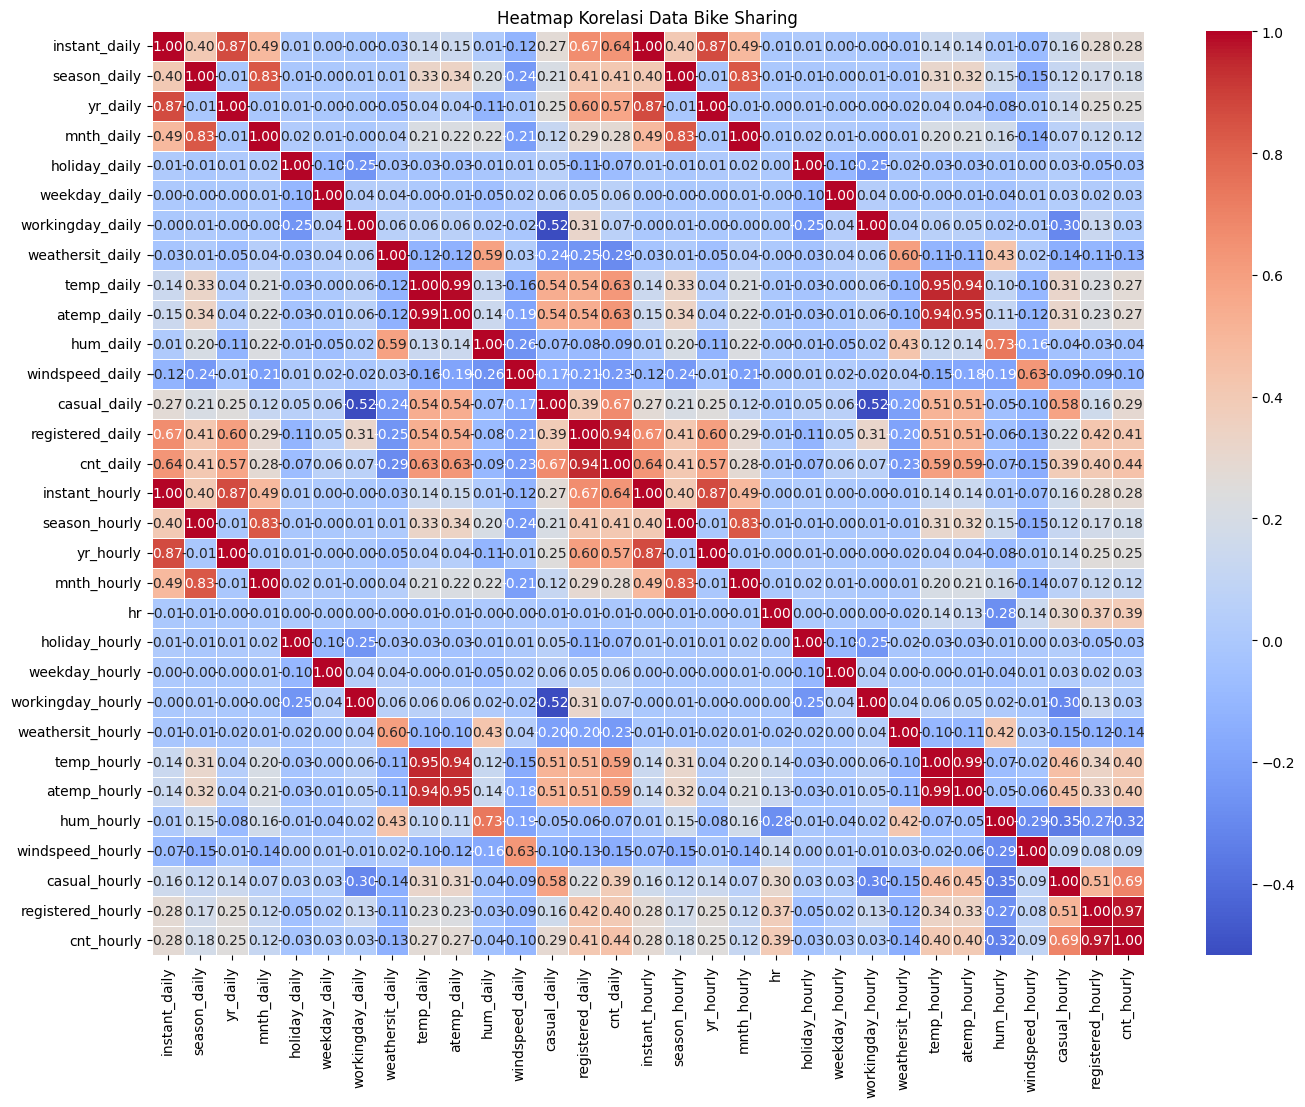

In [44]:
# Menghitung korelasi antar kolom dalam data frame
correlation_matrix = bike_sharing.corr()

# Membuat heatmap korelasi
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, annot_kws={"size": 10})
plt.title('Heatmap Korelasi Data Bike Sharing')
plt.show()

### Pertanyaan 1: Bagaimana pengaruh musim terhadap jumlah peminjaman sepeda harian?

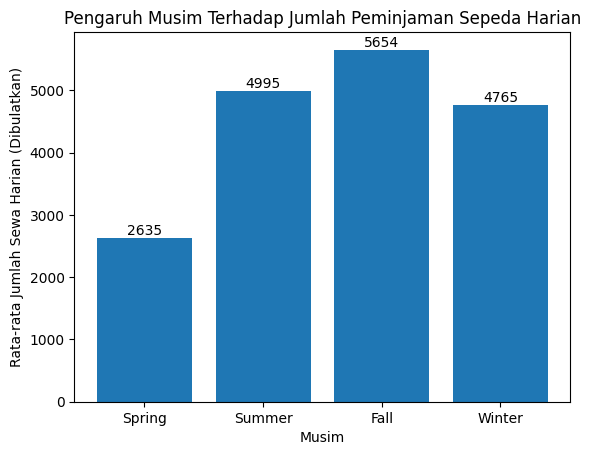

In [58]:
seasonal_data = bike_sharing.groupby('season_daily')['cnt_daily'].mean()
season = ['Spring', 'Summer', 'Fall', 'Winter']
plt.bar(season, seasonal_data)

# Menambahkan nilai rata-rata yang dibulatkan pada tiap batang
for i, value in enumerate(seasonal_data):
    rounded_value = round(value)
    plt.text(i, rounded_value, f'{rounded_value}', ha='center', va='bottom')

plt.xlabel('Musim')
plt.ylabel('Rata-rata Jumlah Sewa Harian (Dibulatkan)')
plt.title('Pengaruh Musim Terhadap Jumlah Peminjaman Sepeda Harian')
plt.show()


Dari grafik di atas, dapat di lihat bahwa jumlah peminjaman sepeda paling banyak terjadi pada musim gugur (Fall), sedangkan jumlah peminjaman sepeda paling sedikit terjadi pada musim semi (spring).

### Pertanyaan 2: Apakah terdapat perbedaan jumlah peminjam sepeda harian antara hari kerja (*workingday*) dan hari libur (*holiday*)?

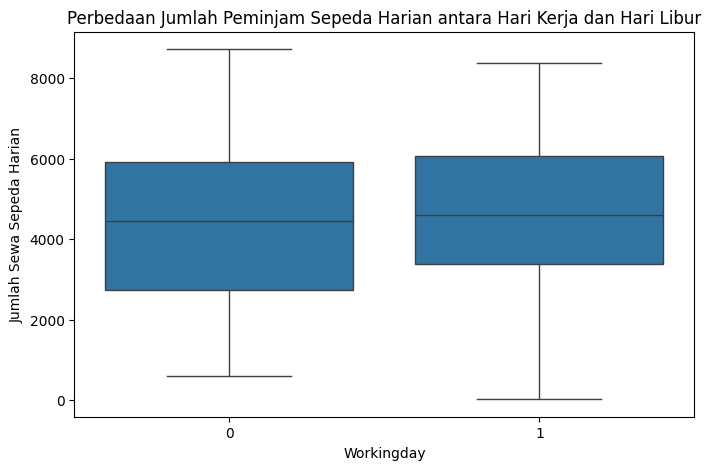

In [60]:
# Perbandingan hari kerja dan hari libur
plt.figure(figsize=(8, 5))
sns.boxplot(x="workingday_daily", y="cnt_daily", data=bike_sharing)
plt.title("Perbedaan Jumlah Peminjam Sepeda Harian antara Hari Kerja dan Hari Libur")
plt.xlabel("Workingday")
plt.ylabel("Jumlah Sewa Sepeda Harian")
plt.show()

Dari grafik di atas, dapat dilihat bahwa jumlah peminjaman sepeda pada hari kerja lebih banyak dibandingkan jumlah peminjaman sepeda pada hari libur.

## Conclusion

- Conclution pertanyaan 1: jumlah peminjaman sepeda paling banyak terjadi pada musim gugur (Fall), sedangkan jumlah peminjaman sepeda paling sedikit terjadi pada musim semi (spring).
- Conclution pertanyaan 2: jumlah peminjaman sepeda pada hari kerja lebih banyak dibandingkan jumlah peminjaman sepeda pada hari libur.